In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [2]:
raw = pd.read_csv('wine_vector.csv')
review = raw.copy(deep=True).drop(columns = ['Unnamed: 0'])
review.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,region
0,0,0.0,8.111582,3.0,0,Napa Valley,Napa,0,0,0
1,1,1.0,8.111582,2.0,1,Toro,NaN,1,1,1
2,0,2.0,8.111582,1.0,0,Knights Valley,Sonoma,2,2,2
3,0,3.0,8.111582,1.0,2,Willamette Valley,Willamette Valley,3,3,3
4,2,4.0,7.111582,1.0,3,Bandol,NaN,4,4,4


In [3]:
srt = sorted(review['points'].unique())
print(srt)
len(srt)

[-7.888418472139406, -6.888418472139406, -5.888418472139406, -4.888418472139406, -3.8884184721394064, -2.8884184721394064, -1.8884184721394064, -0.8884184721394064, 0.1115815278605936, 1.1115815278605936, 2.1115815278605936, 3.1115815278605936, 4.111581527860594, 5.111581527860594, 6.111581527860594, 7.111581527860594, 8.111581527860594, 9.111581527860594, 10.111581527860594, 11.111581527860594, 12.111581527860595]


21

In [4]:
review.loc[(review['points'] > -8) & (review['points'] <= -4), 'points'] = 50
review.loc[(review['points'] > -4) & (review['points'] <= 0), 'points'] = 40
review.loc[(review['points'] > 0) & (review['points'] <= 4), 'points'] = 30
review.loc[(review['points'] > 4) & (review['points'] <= 8), 'points'] = 20
review.loc[(review['points'] > 8) & (review['points'] <= 13), 'points'] = 10
review.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,region
0,0,0.0,10.0,3.0,0,Napa Valley,Napa,0,0,0
1,1,1.0,10.0,2.0,1,Toro,NaN,1,1,1
2,0,2.0,10.0,1.0,0,Knights Valley,Sonoma,2,2,2
3,0,3.0,10.0,1.0,2,Willamette Valley,Willamette Valley,3,3,3
4,2,4.0,20.0,1.0,3,Bandol,NaN,4,4,4


In [5]:
review.points.unique()

array([10., 20., 30., 40., 50.])

In [6]:
review = review.drop(['region_1', 'region_2'], axis=1)
review.head()

,country,designation,points,price,province,variety,winery,region
0,0,0.0,10.0,3.0,0,0,0,0
1,1,1.0,10.0,2.0,1,1,1,1
2,0,2.0,10.0,1.0,0,2,2,2
3,0,3.0,10.0,1.0,2,3,3,3
4,2,4.0,20.0,1.0,3,4,4,4


In [7]:
metrics = list(review.columns)
metrics.remove('points')
metrics

['country', 'designation', 'price', 'province', 'variety', 'winery', 'region']

In [8]:
# standardize data
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis=0)) / np.std(raw_data, axis=0))
review[metrics] = standardize(review[metrics])
review.head()

,country,designation,points,price,province,variety,winery,region
0,-0.763199,-0.828015,10.0,4.837673,-0.551419,-0.610443,-1.310844,-0.799095
1,-0.264075,-0.827900,10.0,2.478687,-0.519664,-0.594970,-1.310533,-0.794537
2,-0.763199,-0.827784,10.0,0.119702,-0.551419,-0.579498,-1.310222,-0.789978
3,-0.763199,-0.827669,10.0,0.119702,-0.487908,-0.564026,-1.309911,-0.785420
4,0.235049,-0.827554,20.0,0.119702,-0.456152,-0.548554,-1.309600,-0.780862


In [9]:
features = review[metrics]
label = review['points']

smt = SMOTE(random_state=20)
    
X_train, X_test, Y_train, Y_test = train_test_split(features, label, 
                                                    test_size=0.20, 
                                                    random_state=0)
X_train, Y_train = smt.fit_sample(X_train, Y_train)
print('train/test set:', len(X_train), len(X_test))

train/test set: 195105 25174


In [10]:
forest = RandomForestClassifier(n_estimators=40, 
                                random_state=0, 
                                max_depth=30, 
                                criterion='entropy')
print('CVS:', np.mean(cross_val_score(forest, X_train, Y_train, cv=10)))

CVS: 0.8247522184895557


ACC: 0.7048939381901962
Confusion Matrix:
 [[ 179   72   17    3    2]
 [ 123 2462  789  267   49]
 [  39 1020 6625 1476  252]
 [  18  301 1558 7158  701]
 [   3   25  171  543 1321]]
Overall Report:
               precision    recall  f1-score   support

        10.0       0.49      0.66      0.56       273
        20.0       0.63      0.67      0.65      3690
        30.0       0.72      0.70      0.71      9412
        40.0       0.76      0.74      0.75      9736
        50.0       0.57      0.64      0.60      2063

   micro avg       0.70      0.70      0.70     25174
   macro avg       0.64      0.68      0.66     25174
weighted avg       0.71      0.70      0.71     25174



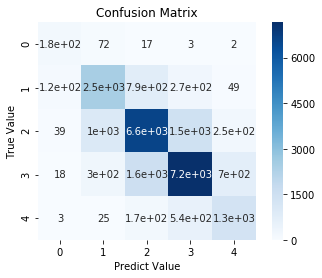

In [11]:
forest.fit(X_train, Y_train)
Y_test_predict = forest.predict(X_test)
print('ACC:', accuracy_score(Y_test, Y_test_predict))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_test_predict))
mat = confusion_matrix(Y_test, Y_test_predict)
sns.heatmap(mat, square=True, annot=True, cmap='Blues')
plt.xlabel('Predict Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
print('Overall Report:\n', classification_report(Y_test, Y_test_predict))